## Coronary Heart Disease Risk Prediction

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns

%matplotlib inline

### Extracting data from CSV file

In [3]:
data = pd.read_csv('framingham.csv')
data.drop(['education'],axis=1,inplace=True) # Dropping education column as it holds no relevance to the CHD risk
data.shape

(4240, 15)

In [4]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Data pre-processing

In [5]:
# calculating the total percentage of missing data (na/null values)
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100

print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 12.74%


In [6]:
# calculating the percentage of missing data for each column
total = data.isnull().sum().sort_values(ascending=False)
percent_total = round((data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100,2)
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total'] > 0]

missing_data

,Total,Percentage
glucose,388,9.15
BPMeds,53,1.25
totChol,50,1.18
cigsPerDay,29,0.68
BMI,19,0.45
heartRate,1,0.02


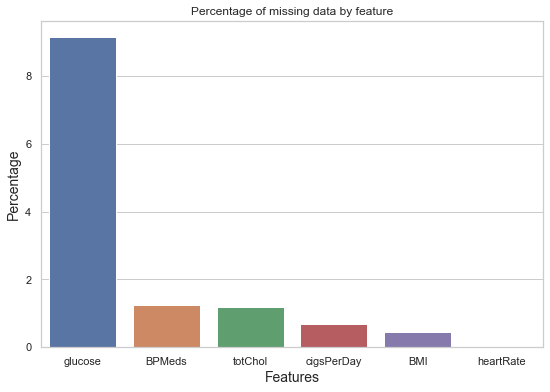

In [7]:
# plotting the percentage of missing data by feature
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [8]:
# Removing the missing data
data.dropna(axis=0, inplace=True)

data.shape

(3751, 15)

In [9]:
# checking datatypes of the features
data.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

### Exploratory Data Analysis

In [10]:
# creating two different lists for plotting and analyzing continuous data and categorical data

data_categorical = data[['BPMeds', 'currentSmoker', 'diabetes', 'male', 'prevalentHyp', 'prevalentStroke','TenYearCHD']]
data_continuous = data[['BMI', 'age','cigsPerDay', 'diaBP', 'glucose', 'heartRate', 'sysBP', 'totChol']]

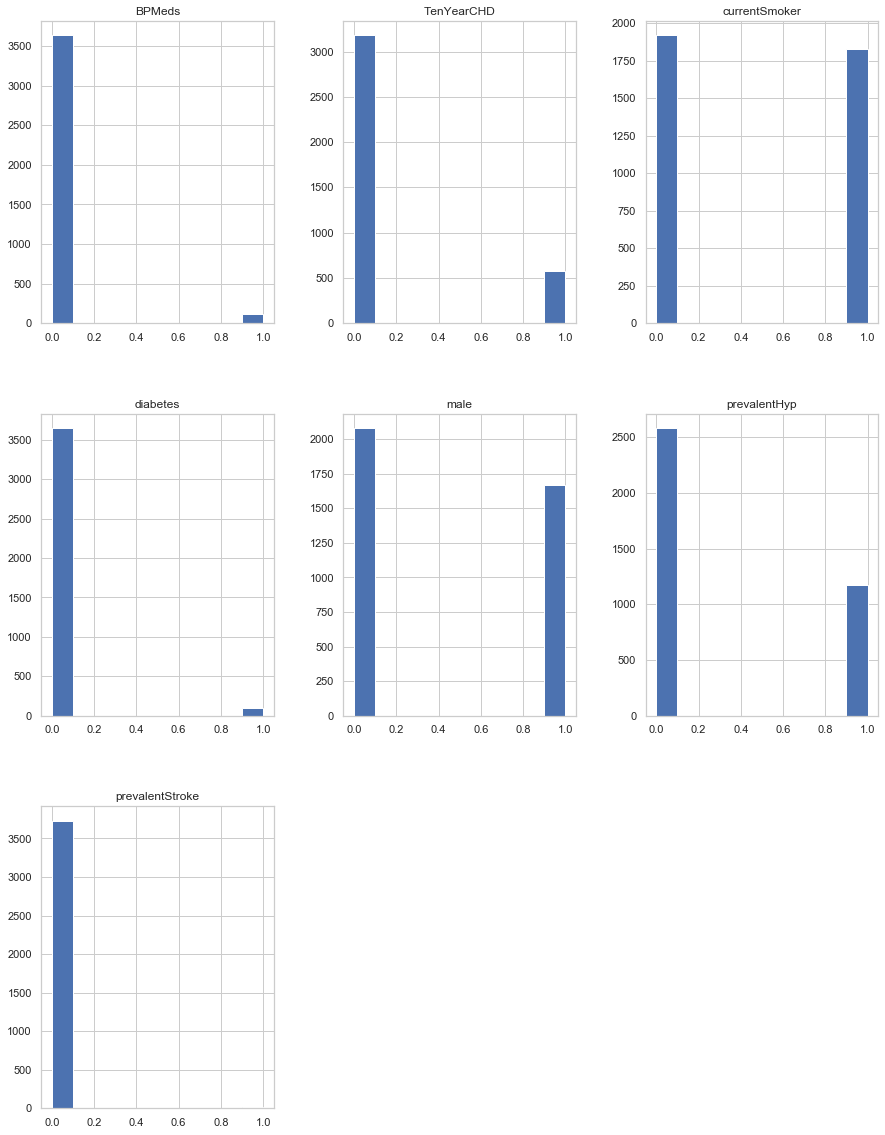

In [11]:
# plot histogram for categorical data to see the distribution of the data

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data_categorical.hist(ax = ax)
plt.show()

Preliminary Analysis : 
Based on the graphs generated, we can see that the data for the prevalent stroke (prevalentStroke), diabetes, and blood pressure meds (BPMeds) is poorly balanced. Hence we shouldn't include these features in the training dataset.

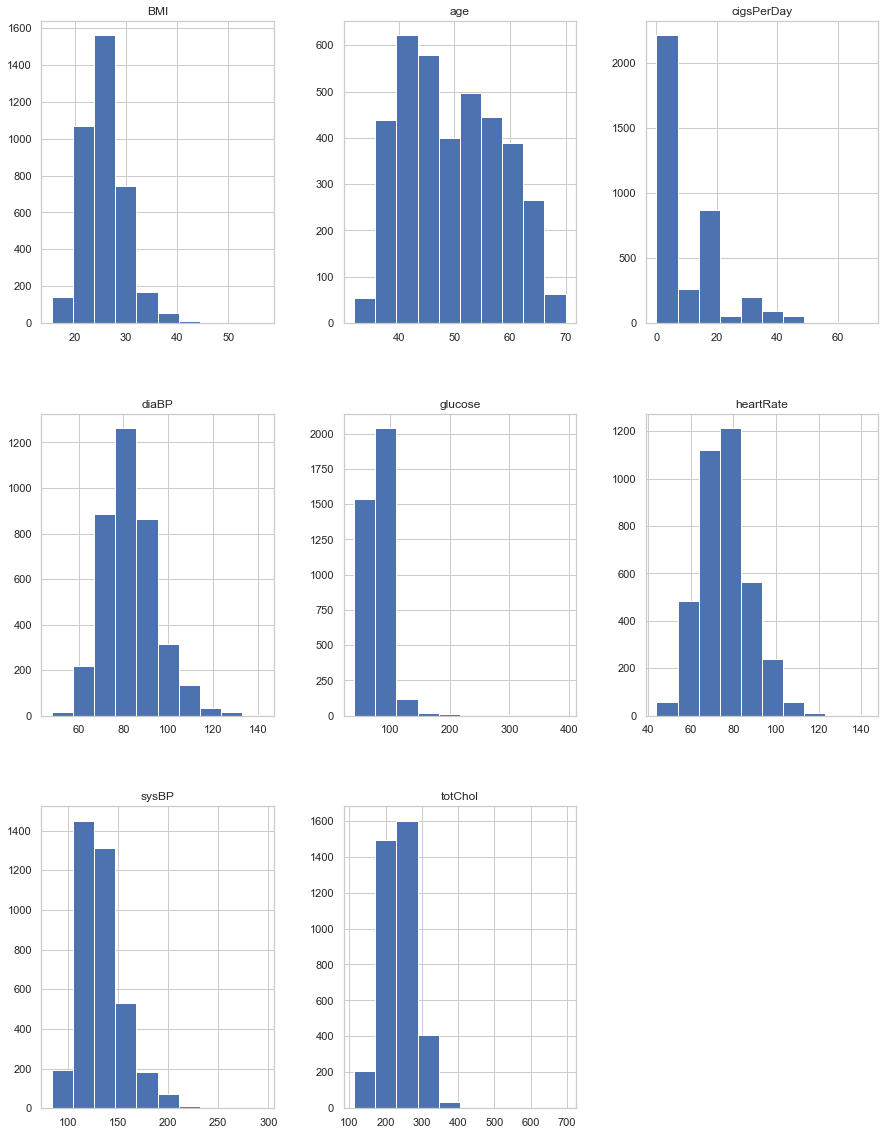

In [12]:
# plot histogram for continuous data to see its distribution

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data_continuous.hist(ax = ax)
plt.show()

Preliminary Analysis : Based on the graphs generated, we can see that most of the data for each feature is well-balanced. Hence this data can be used for our training dataset.

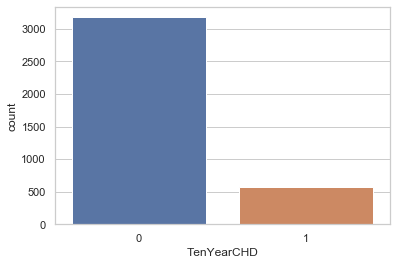

There are 3179 patients without heart disease and 572 patients with the disease


In [13]:
# plotting the data based on Heart Disease case counts.
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()

print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

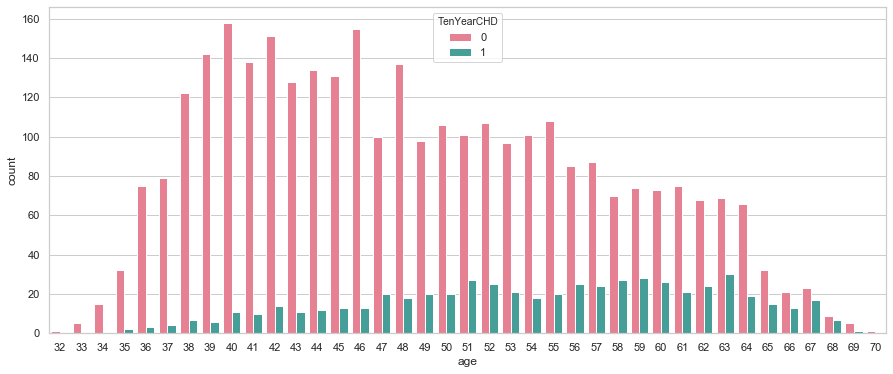

In [14]:
# Plotting the number of people having heart disease vs age
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = data, hue = 'TenYearCHD',palette='husl')
plt.show()

### Outlier Analysis

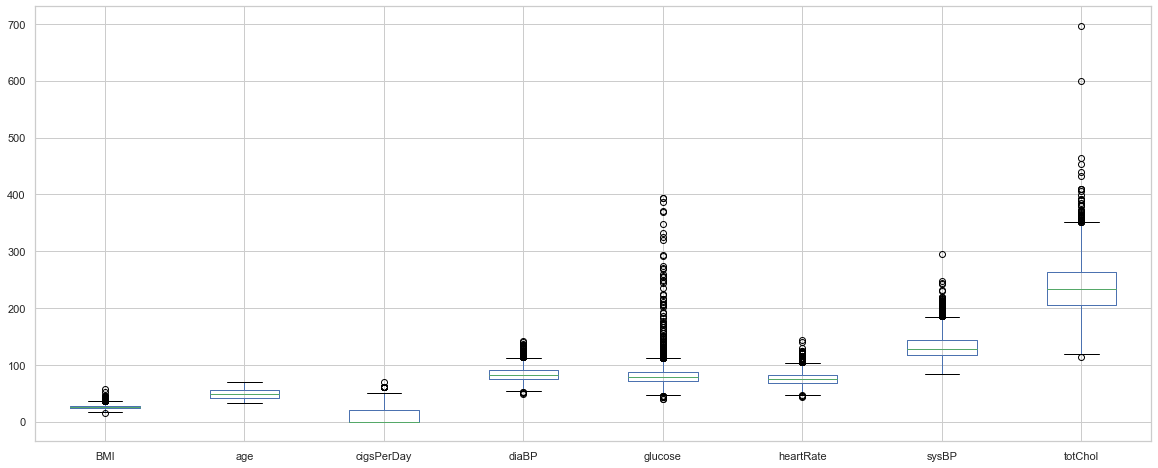

In [15]:
# doing outlier analysis by using box and whisker plot
data_continuous.boxplot(return_type='axes',figsize=(20,8))

### Correlation Heat Map for continuous features

(8.0, 0.0)

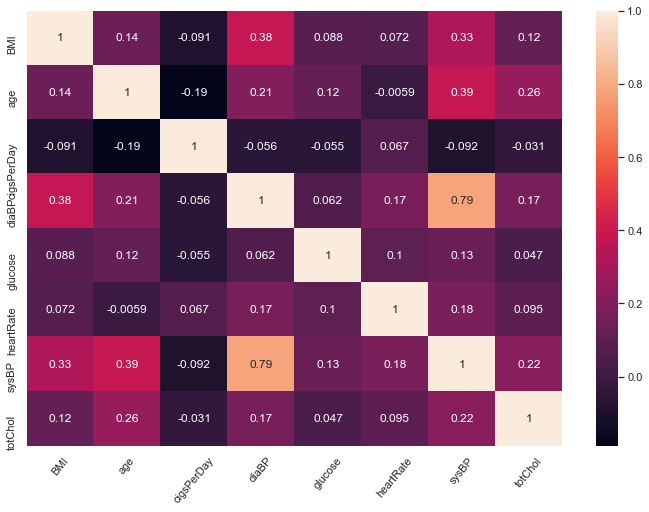

In [16]:
plt.figure(figsize=(12,8))
heatmap_plot = sns.heatmap(data_continuous.corr(),xticklabels=data_continuous.corr().columns.values,
           yticklabels=data_continuous.corr().columns.values,annot=True);
plt.xticks(rotation=50)
bottom, top = heatmap_plot.get_ylim()
heatmap_plot.set_ylim(bottom + 0.5, top - 0.5)

### Bivariate Analysis

In [17]:
# converting 1s and 0s to Yes and No respectively
data_categorical = data_categorical.astype(object)

In [18]:
data_categorical['TenYearCHD'] = data_categorical['TenYearCHD'].map({1:"Yes",0:"No"})
data_categorical['BPMeds'] = data_categorical['BPMeds'].map({1:"Yes",0:"No"})
data_categorical['male'] = data_categorical['male'].map({1:"Male",0:"Female"})
data_categorical['currentSmoker'] = data_categorical['currentSmoker'].map({1:"Yes",0:"No"})
data_categorical['diabetes'] = data_categorical['diabetes'].map({1:"Yes",0:"No"})
data_categorical['prevalentHyp'] = data_categorical['prevalentHyp'].map({1:"Yes",0:"No"})
data_categorical['prevalentStroke'] = data_categorical['prevalentStroke'].map({1:"Yes",0:"No"})

data_categorical

,BPMeds,currentSmoker,diabetes,male,prevalentHyp,prevalentStroke,TenYearCHD
0,No,No,No,Male,No,No,No
1,No,No,No,Female,No,No,No
2,No,Yes,No,Male,No,No,No
3,No,Yes,No,Female,Yes,No,Yes
4,No,Yes,No,Female,No,No,No
...,...,...,...,...,...,...,...
4233,No,Yes,No,Male,Yes,No,Yes
4234,No,Yes,No,Male,No,No,No
4237,No,No,No,Female,No,No,No
4238,No,No,No,Male,Yes,No,No


In [19]:
def bi_variate(df,col1,col2):
    cross_name = pd.crosstab(df[col1],df[col2]).apply(lambda x:x/x.sum()*100, axis=1)
    
    ax = cross_name.plot.bar(rot=0)
    ax.legend(bbox_to_anchor=(1, 1),title='TenYearCHD')

    plt.xlabel('{}'.format(col1))
    plt.ylabel('% of TenYearCHD')
    plt.title('{} vs TenYearCHD'.format(col1))
    plt.xticks(rotation=0)
    plt.figure(figsize=(16,21))
    plt.show()
    
    return cross_name

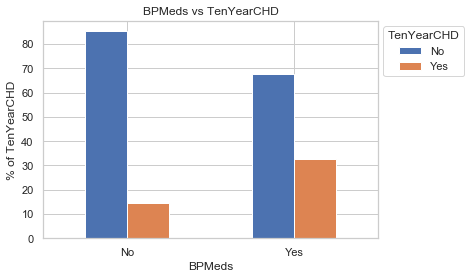

<Figure size 1152x1512 with 0 Axes>

TenYearCHD,No,Yes
BPMeds,,
No,85.290074,14.709926
Yes,67.543860,32.456140


In [20]:
bi_variate(data_categorical,'BPMeds','TenYearCHD')

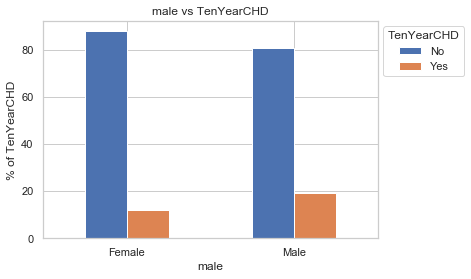

<Figure size 1152x1512 with 0 Axes>

TenYearCHD,No,Yes
male,,
Female,87.842383,12.157617
Male,80.898204,19.101796


In [21]:
bi_variate(data_categorical,'male','TenYearCHD')

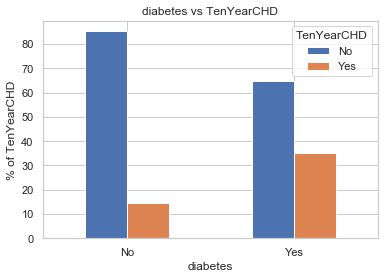

<Figure size 1152x1512 with 0 Axes>

TenYearCHD,No,Yes
diabetes,,
No,85.311044,14.688956
Yes,64.705882,35.294118


In [22]:
bi_variate(data_categorical,'diabetes','TenYearCHD')

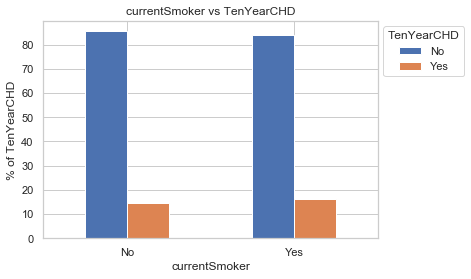

<Figure size 1152x1512 with 0 Axes>

TenYearCHD,No,Yes
currentSmoker,,
No,85.513288,14.486712
Yes,83.951965,16.048035


In [23]:
bi_variate(data_categorical,'currentSmoker','TenYearCHD')

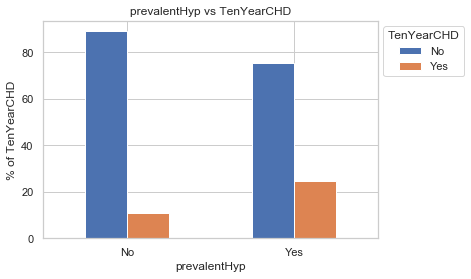

<Figure size 1152x1512 with 0 Axes>

TenYearCHD,No,Yes
prevalentHyp,,
No,89.074002,10.925998
Yes,75.213675,24.786325


In [24]:
bi_variate(data_categorical,'prevalentHyp','TenYearCHD')

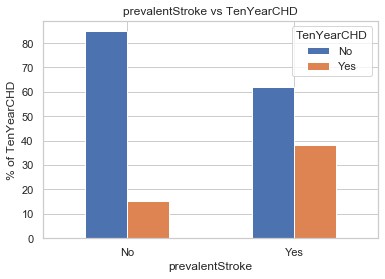

<Figure size 1152x1512 with 0 Axes>

TenYearCHD,No,Yes
prevalentStroke,,
No,84.879357,15.120643
Yes,61.904762,38.095238


In [25]:
bi_variate(data_categorical,'prevalentStroke','TenYearCHD')

### Feature Selection

Based on the above graphs representations, we narrowed down top 7 features which had fairly distributed data. The features are as below:
1. Age
2. Total Cholestrol (totChol)
3. Systolic BP (sysBP)
4. Diastolic BP (diaBP)
5. BMI
6. Heart Rate
7. Glucose levels

In [26]:
# creating two different dataframes for features and target variable.

features = data[['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
label = data[['TenYearCHD']]

### Splitting the Data into Training and Testing datasets

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,label, test_size = 0.3,random_state=42)

### ML Model Implementation

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,precision_score,classification_report,confusion_matrix

#### Model 1 : K Nearest Neighbors Classifier

In [29]:
# searching for optimum parameters using GridSearch

params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [30]:
# training the KNN classifier
knn_clf.fit(X_train,y_train)

knn_clf.best_params_

{'n_neighbors': 8}

In [31]:
# Knn model prediction
knn_predict = knn_clf.predict(X_test)

In [32]:
# Calculating model metrics - Accuracy, f1 score, Precision

knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

knn_f1 = f1_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an F1 Score of {round(knn_f1*100,2)}%")

knn_precision = precision_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an Precision of {round(knn_precision*100,2)}%")

Using k-nearest neighbours we get an accuracy of 83.39%
Using k-nearest neighbours we get an F1 Score of 11.37%
Using k-nearest neighbours we get an Precision of 52.17%


(2.0, 0.0)

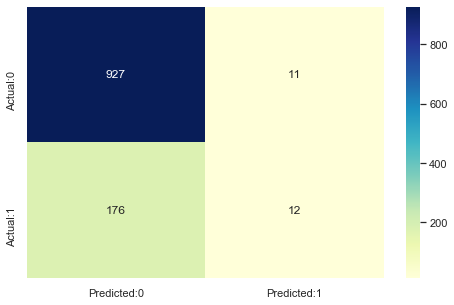

In [33]:
# Plotting the confusion matrix for KNN

cm = confusion_matrix(y_test,knn_predict)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
heatmap_plot = sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
bottom, top = heatmap_plot.get_ylim()
heatmap_plot.set_ylim(bottom + 0.5, top - 0.5)

In [34]:
# displaying the classification report in tabular format
report = classification_report(y_test,knn_predict,output_dict=True)
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       938
           1       0.52      0.06      0.11       188

    accuracy                           0.83      1126
   macro avg       0.68      0.53      0.51      1126
weighted avg       0.79      0.83      0.78      1126



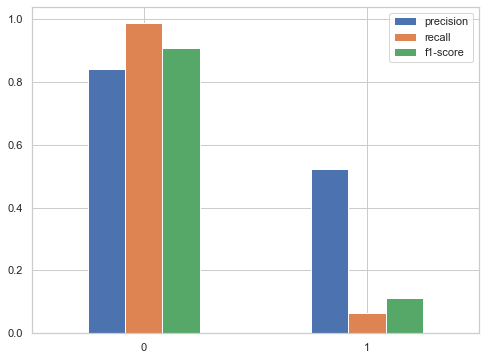

In [35]:
# Plotting a bar chart from the report
metrics = ['precision','recall','f1-score']
pd.DataFrame(report).transpose().iloc[0:2].plot(kind='bar',y= metrics,figsize=(8,6),rot=0)

#### Model 2 : Random Forest Classifier

In [36]:
# Training the random forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=7)  
clf = classifier.fit(X_train, y_train)

In [37]:
# Random Forest model prediction
random_pred = classifier.predict(X_test) 

In [38]:
# Calculating model metrics - Accuracy, f1 score, Precision

random_accuracy = accuracy_score(y_test, random_pred)
print(f"Using Random Forest model we get an accuracy of {round(random_accuracy*100,2)}%")
random_f1 = f1_score(y_test,random_pred)
print(f"Using Random Forest model we get an F1 Score of {round(random_f1*100,2)}%")
random_precision = precision_score(y_test,random_pred)
print(f"Using Random Forest model we get an Precision of {round(random_precision*100,2)}%")

Using Random Forest model we get an accuracy of 82.06%
Using Random Forest model we get an F1 Score of 7.34%
Using Random Forest model we get an Precision of 26.67%


(2.0, 0.0)

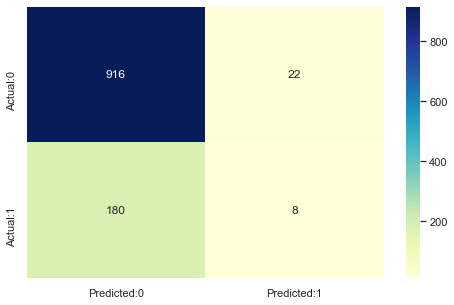

In [39]:
# Plotting the confusion matrix for Random Forest

cm = confusion_matrix(y_test,random_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
heatmap_plot=sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
bottom, top = heatmap_plot.get_ylim()
heatmap_plot.set_ylim(bottom + 0.5, top - 0.5)

In [40]:
# displaying the classification report in tabular format
report = classification_report(y_test,random_pred,output_dict=True)
print(classification_report(y_test, random_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       938
           1       0.27      0.04      0.07       188

    accuracy                           0.82      1126
   macro avg       0.55      0.51      0.49      1126
weighted avg       0.74      0.82      0.76      1126



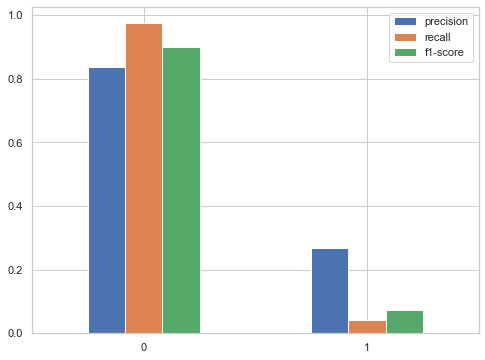

In [41]:
# Plotting a bar chart from the report
metrics = ['precision','recall','f1-score']
pd.DataFrame(report).transpose().iloc[0:2].plot(kind='bar',y= metrics,figsize=(8,6),rot=0)

#### Model 3 : Decision Tree Classifier

In [42]:
# grid search for optimum parameters
dtree = DecisionTreeClassifier(random_state=7)

params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [43]:
# training the decision tree classifier
tree_clf.fit(X_train,y_train)

tree_clf.best_params_

{'max_features': 'auto', 'min_samples_leaf': 11, 'min_samples_split': 2}

In [44]:
# Decision Tree Model prediction
tree_predict = tree_clf.predict(X_test)

In [45]:
# Calculating model metrics - Accuracy, f1 score, Precision

tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")
tree_f1 = f1_score(y_test,tree_predict)
print(f"Using Decision Trees we get an F1 Score of {round(tree_f1*100,2)}%")
tree_precision = precision_score(y_test,tree_predict)
print(f"Using Decision Trees we get an Precision of {round(tree_precision*100,2)}%")

Using Decision Trees we get an accuracy of 79.93%
Using Decision Trees we get an F1 Score of 21.53%
Using Decision Trees we get an Precision of 31.0%


(2.0, 0.0)

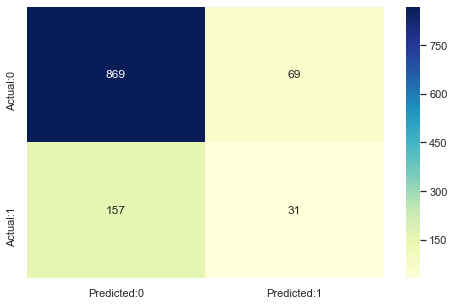

In [46]:
# Plotting the confusion matrix for Decision Tree

cm = confusion_matrix(y_test,tree_predict)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
heatmap_plot=sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
bottom, top = heatmap_plot.get_ylim()
heatmap_plot.set_ylim(bottom + 0.5, top - 0.5)

In [47]:
# displaying the classification report in tabular format
report = classification_report(y_test,tree_predict,output_dict=True)
print(classification_report(y_test, tree_predict))

              precision    recall  f1-score   support

           0       0.85      0.93      0.88       938
           1       0.31      0.16      0.22       188

    accuracy                           0.80      1126
   macro avg       0.58      0.55      0.55      1126
weighted avg       0.76      0.80      0.77      1126



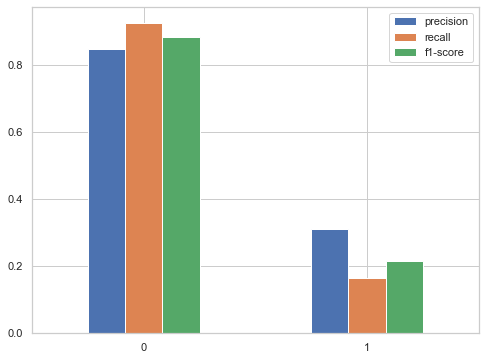

In [48]:
# Plotting a bar chart from the report
metrics = ['precision','recall','f1-score']
pd.DataFrame(report).transpose().iloc[0:2].plot(kind='bar',y= metrics,figsize=(8,6),rot=0)

#### Model 4 : Logistic Regression Classifier

In [49]:
# search for optimun parameters using gridsearch

params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [50]:
#training the logistic regression classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 10, 'class_weight': None, 'penalty': 'l1'}

In [51]:
# Logistic Regression model prediction
logistic_predict = logistic_clf.predict(X_test)

In [52]:
# Calculating model metrics - Accuracy, f1 score, Precision

log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")
log_f1 = f1_score(y_test,logistic_predict)
print(f"Using logistic regression we get an F1 Score of {round(log_f1*100,2)}%")
log_precision = precision_score(y_test,logistic_predict)
print(f"Using logistic regression we get an Precision of {round(log_precision*100,2)}%")

Using logistic regression we get an accuracy of 83.13%
Using logistic regression we get an F1 Score of 8.65%
Using logistic regression we get an Precision of 45.0%


(2.0, 0.0)

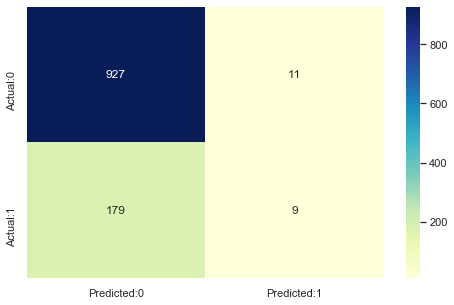

In [53]:
# Plotting the confusion matrix for Logistic Regression

cm = confusion_matrix(y_test,logistic_predict)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
heatmap_plot = sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
bottom, top = heatmap_plot.get_ylim()
heatmap_plot.set_ylim(bottom + 0.5, top - 0.5)

In [54]:
# displaying the classification report in tabular format
report = classification_report(y_test,logistic_predict,output_dict=True)
print(classification_report(y_test, logistic_predict))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       938
           1       0.45      0.05      0.09       188

    accuracy                           0.83      1126
   macro avg       0.64      0.52      0.50      1126
weighted avg       0.77      0.83      0.77      1126



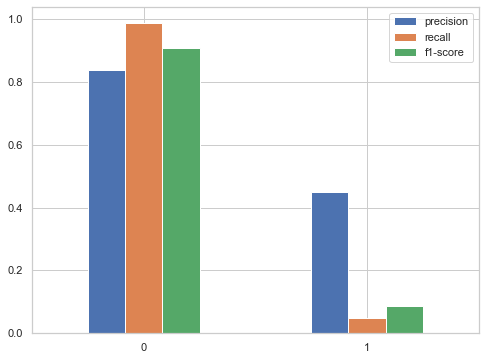

In [55]:
# Plotting a bar chart from the report
metrics = ['precision','recall','f1-score']
# a simple line plot
pd.DataFrame(report).transpose().iloc[0:2].plot(kind='bar',y= metrics,figsize=(8,6),rot=0)

### Model Comparison

In [56]:
# Creating a dataframe with all the models used
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'Precision':log_precision, 'F1 score':log_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'Precision':knn_precision, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'Precision':tree_precision, 'F1 score':tree_f1},
    "Random Forest":{'Accuracy':random_accuracy, 'Precision':random_precision, 'F1 score':random_f1}
}).T

comparison

,Accuracy,Precision,F1 score
Logistic regression,0.831261,0.450000,0.086538
K-nearest neighbours,0.833925,0.521739,0.113744
Decision trees,0.799290,0.310000,0.215278
Random Forest,0.820604,0.266667,0.073394


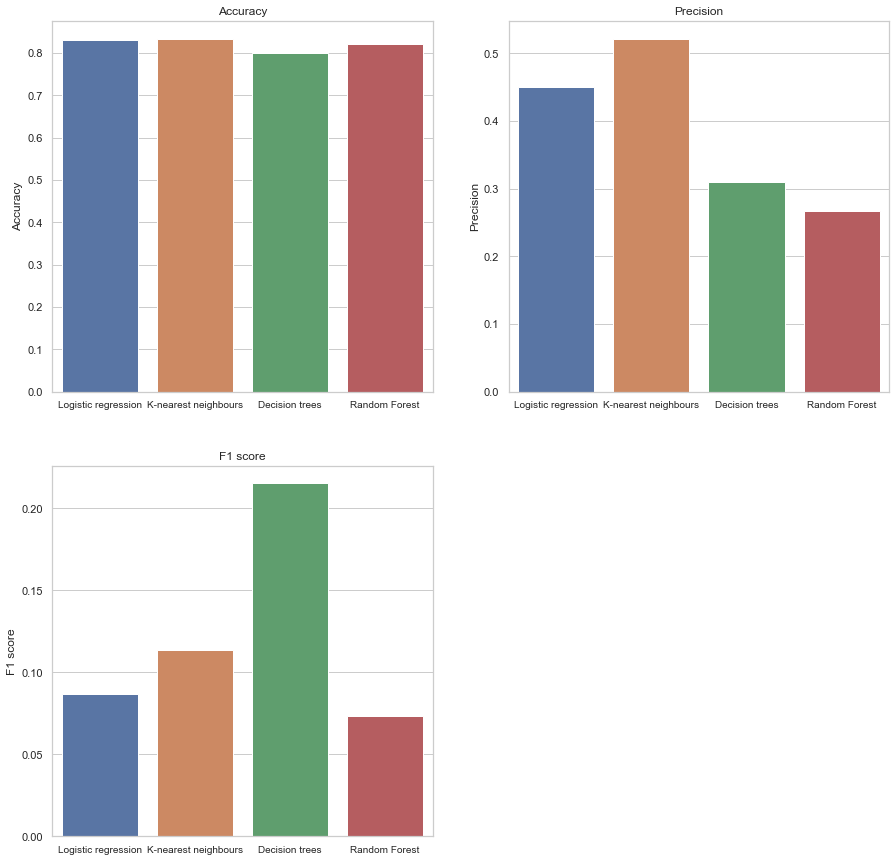

In [57]:
# plotting the metrics using a bar chart

fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['Accuracy','Precision','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

### Conclusion

1) Based on our exploratory data analysis, age, totChol, sysBP, diaBP, BMI, heartRate and glucose were identified as the top 6 features which had equally distributed data.

2) Among the 4 classifiers, Logistic Regression and K-Nearest Neighbour classifiers had the best accuracy rates. However, the K-Nearest Neighbour classifier was the best performing model in terms of both accuracy and precision.

3) We can see that the dataset is not equally balanced for the TenYearCHD feature (which is our target variable). As part of the future scope, we can use Smote technique which would help in improving the models sensitivity by balancing the datasets.

### References : 
##### [1] Dataset - https://biolincc.nhlbi.nih.gov/studies/framcohort/
##### [2] https://towardsdatascience.com/heart-disease-risk-assessment-using-machine-learning-83335d077dad
##### [3] https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/
##### [4] https://www.analyticsvidhya.com/blog/2020/10/introduction-to-logistic-regression-the-most-common-classification-algorithm/
##### [5] https://www.analyticsvidhya.com/blog/2014/06/introduction-random-forest-simplified/
##### [6] https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/ 
##### [7] https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

### Team Members :
##### Anuja Naik (001372454)
##### Eshanee Thakur (001302966)
##### Ritesh Pendurkar (001376847)
##### Rohit Gulati (001083445)